## Arbol de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
data.shape

(150, 5)

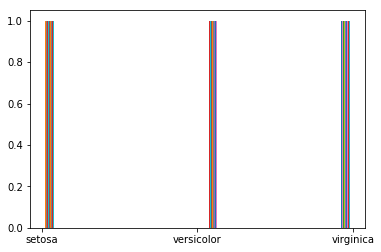

In [3]:
plot = plt.hist(data.Species)

In [4]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

(array([  31.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  119.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

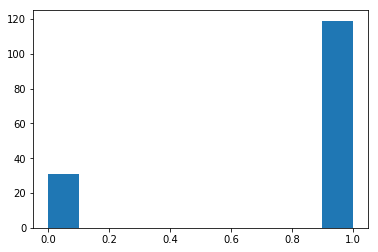

In [5]:
data["train"] = np.random.uniform(0, 1, len(data)) <= 0.75
plt.hist(data.train)

In [6]:
train, test = data[data.train == True], data[data.train == False]
train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,train
0,5.1,3.5,1.4,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True
5,5.4,3.9,1.7,0.4,setosa,True
6,4.6,3.4,1.4,0.3,setosa,True
7,5.0,3.4,1.5,0.2,setosa,True
11,4.8,3.4,1.6,0.2,setosa,True
13,4.3,3.0,1.1,0.1,setosa,True
14,5.8,4.0,1.2,0.2,setosa,True
15,5.7,4.4,1.5,0.4,setosa,True


In [7]:
#min_samples_split indica el minimo de valores que tiene que haber en un nodo para que se divida en subnodos
#si es muy pequeño hay overfitting
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)

tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best')

In [8]:
predictions = tree.predict(test[predictors])

In [9]:
pd.crosstab(test[target], predictions, rownames=["actual"],colnames=["predicted"])

predicted,setosa,versicolor,virginica
actual,,,
setosa,12,0,0
versicolor,0,4,3
virginica,0,1,11


## Visualización del árbol de decisión

Exportamos un archivo .dot con toda la información del árbol.

In [10]:
from sklearn.tree import export_graphviz

with open("resources/iris.dot", "w") as dot_file:
    export_graphviz(tree, dot_file, feature_names=predictors)
    dot_file.close()

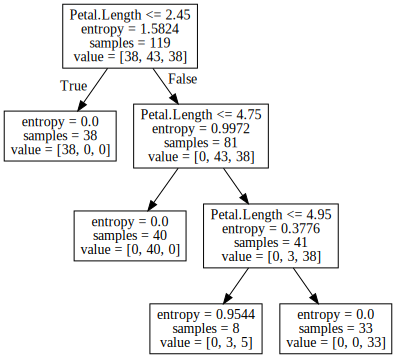

In [12]:
import os
from graphviz import Source

with open("resources/iris.dot", "r") as dot_file:
    text = dot_file.read()

#value = [Setosa, versicolor, virginica]
Source(text)

## Cross validation para la poda

Podamos el árbol para obtener una profundidad óptima

In [32]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

X = data[predictors]
y = data[target]

tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best')

In [34]:
#Tecnica de validación cruzada a utilizar: 10 subgrupos
cv = KFold(n=X.shape[0], n_folds=10, shuffle=True, random_state=1)

scores = cross_val_score(tree, X, y, scoring="accuracy", cv=cv)
scores

array([ 1.        ,  0.93333333,  0.93333333,  0.93333333,  1.        ,
        0.93333333,  1.        ,  0.86666667,  0.93333333,  0.8       ])

In [35]:
#Obtenemos la media de la exactitud del arbol usando la técnica de validación cruzada declarada
score = np.mean(scores)
score

0.93333333333333335

In [49]:
for i in range(1, 11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X, y)
    cv = KFold(n=X.shape[0], n_folds=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, y, scoring="accuracy", cv=cv)
    score = np.mean(scores)
    print("Score para i = ", i, ": ", score)
    print(tree.feature_importances_)

Score para i =  1 :  0.566666666667
[ 0.  0.  1.  0.]
Score para i =  2 :  0.92
[ 0.          0.          0.66620285  0.33379715]
Score para i =  3 :  0.94
[ 0.          0.          0.68976981  0.31023019]
Score para i =  4 :  0.933333333333
[ 0.          0.          0.66869158  0.33130842]
Score para i =  5 :  0.933333333333
[ 0.          0.          0.66869158  0.33130842]
Score para i =  6 :  0.933333333333
[ 0.          0.          0.66869158  0.33130842]
Score para i =  7 :  0.933333333333
[ 0.          0.          0.66869158  0.33130842]
Score para i =  8 :  0.933333333333
[ 0.          0.          0.66869158  0.33130842]
Score para i =  9 :  0.933333333333
[ 0.          0.          0.66869158  0.33130842]
Score para i =  10 :  0.933333333333
[ 0.          0.          0.66869158  0.33130842]


Observamos que para profundidad $\geq$ 4, la puntuación se mantiene constante.<br>
El máximo está en max_depth=3
<br><br>
También mostramos la importancia de cada feature (El atributo que más información aporta)